___
# Exploration to create a GAN for Generating MNIST Handwritten Digits




## Exploration & Test

In [3]:
# import data 
from keras.datasets.mnist import load_data

# load mnist img in memory 
(train_X, train_y), (test_X, test_y) = load_data()

# check the shape 
print('Tain : ', train_X.shape, train_y.shape)
print('Test : ', test_X.shape, test_y.shape)

Tain :  (60000, 28, 28) (60000,)
Test :  (10000, 28, 28) (10000,)


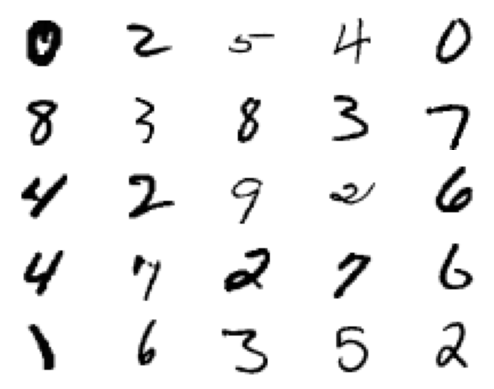

In [18]:
import matplotlib.pyplot as plt
import random

random_img = random.sample(range(0, 59999), 25)

for i, num in enumerate(random_img):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(train_X[num], cmap='gray_r')
plt.show()

## The Discriminator Model

In [1]:
# import dependencies for model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# import to plot the sum of the moddel more clearly
from keras.utils.vis_utils import plot_model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

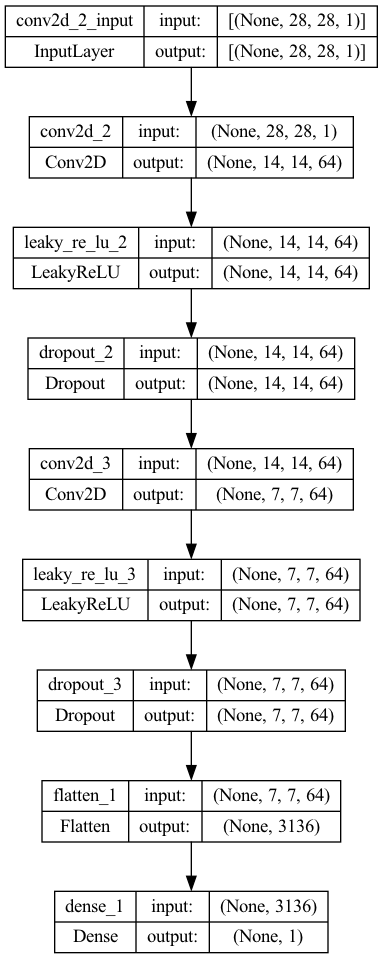

In [3]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))

	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

	return model

# define model
model = define_discriminator()

# summarize the model
model.summary()

# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)